# Example of upper limit computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import pltdist, plotfitresult, plotlimit

import zfit
from zfit.loss import ExtendedUnbinnedNLL
from zfit.minimize import Minuit

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests import UpperLimit
from hepstats.hypotests.parameters import POI, POIarray

/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
plt.rcParams['figure.figsize'] = (9,8)
plt.rcParams['font.size'] = 16

### Fit of a Gaussian signal over an exponential background:

In [3]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 10)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

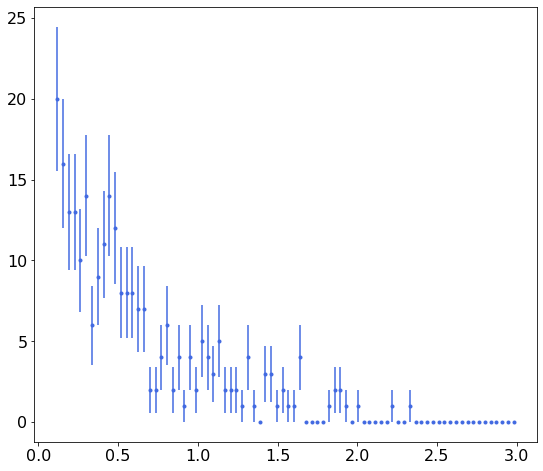

In [4]:
pltdist(data, bins=80, bounds=bounds)

In [5]:
data.size

256

In [6]:
obs = zfit.Space('x', limits=bounds)

In [7]:
lambda_ = zfit.Parameter("lambda",-2.0, -4.0, -1.0)
Nsig = zfit.Parameter("Nsig", 1., -20., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [8]:
signal = zfit.pdf.Gauss(obs=obs, mu=1.2, sigma=0.1).create_extended(Nsig)
background = zfit.pdf.Exponential(obs=obs, lambda_=lambda_).create_extended(Nbkg)
tot_model = zfit.pdf.SumPDF([signal, background])

In [9]:
# Create the negative log likelihood
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=tot_model, data=data_) 

In [10]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [11]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)
minimum.hesse()
print(minimum)

/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


------------------------------------------------------------------
| FCN = -1077                   |      Ncalls=57 (57 total)      |
| EDM = 2.88e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
FitResult of
<ExtendedUnbinnedNLL model=[<zfit.SumPDF  params=[Composed_autoparam_3, Composed_autoparam_4] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7fc0865b2610>] constraints=[]> 
w

Text(0, 0.5, 'number of events')

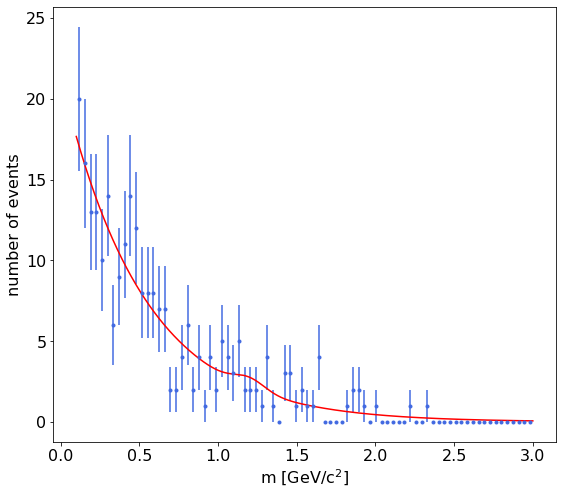

In [12]:
nbins = 80
pltdist(data, nbins, bounds)
plotfitresult(tot_model, bounds, nbins)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")

### Upper limit:

Since the signal yield Nsig = $4.5 \pm 5.8$  is consistent with zero signal we compute the CLs upper limit at 95% confidence level on Nsig.

In [13]:
# instantation of the calculator
calculator = AsymptoticCalculator(nll, minimizer)
calculator.bestfit = minimum #optionnal

In [14]:
# parameter of interest of the null hypothesis
poinull = POIarray(Nsig, np.linspace(0.0, 25, 20))
# parameter of interest of the alternative hypothesis
poialt = POI(Nsig, 0)

In [15]:
# instantation of the discovery test
ul = UpperLimit(calculator, poinull, poialt)

In [16]:
ul.upperlimit(alpha=0.05, CLs=True);


Get fitted values of the nuisance parameters for the alternative hypothesis!
------------------------------------------------------------------
| FCN = -1077                   |      Ncalls=26 (26 total)      |
| EDM = 0.000416 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
FitResult of
<ExtendedUnbinnedNLL model=[<zfit.SumPDF  params=[Composed_autoparam_3, Composed_autoparam_4] dtype=float

/Users/matthieumarinangeli/hepstats/src/hepstats/hypotests/calculators/asymptotic_calculator.py:34: UserWarning: The function <function Space.limit1d at 0x7fc0a390d8c0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=(0,), limits=(array([[0.1]]), array([[3.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  bounds = space.limit1d
/Users/matthieumarinangeli/hepstats/src/hepstats/hypotests/calculators/asymptotic_calculator.py:39: UserWarning: The function <function Space.area at 0x7fc0a390d680> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=(0,), limits=(array([[0.1]]), array([[3.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  hist *= space.area() / nbins
/User


Observed upper limit: Nsig = 15.723672534238545
Expected upper limit: Nsig = 11.464135201063888
Expected upper limit +1 sigma: Nsig = 16.72946656676461
Expected upper limit -1 sigma: Nsig = 7.9770825183056555
Expected upper limit +2 sigma: Nsig = 23.71858728917526
Expected upper limit -2 sigma: Nsig = 5.805213862627448


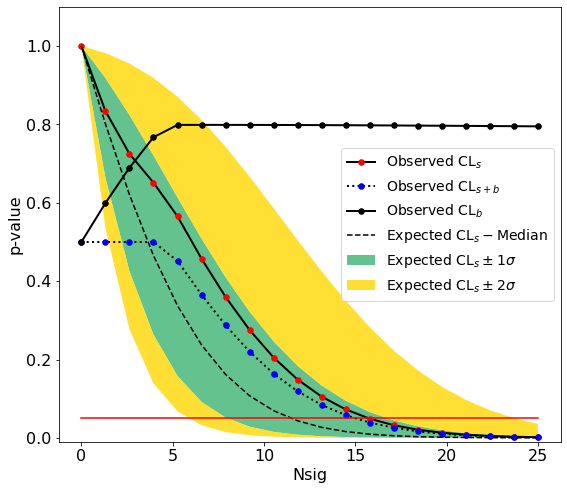

In [17]:
f = plt.figure(figsize=(9, 8))
plotlimit(ul, alpha=0.05, CLs=True)
plt.xlabel("Nsig")
f.savefig("asy_ul.png")

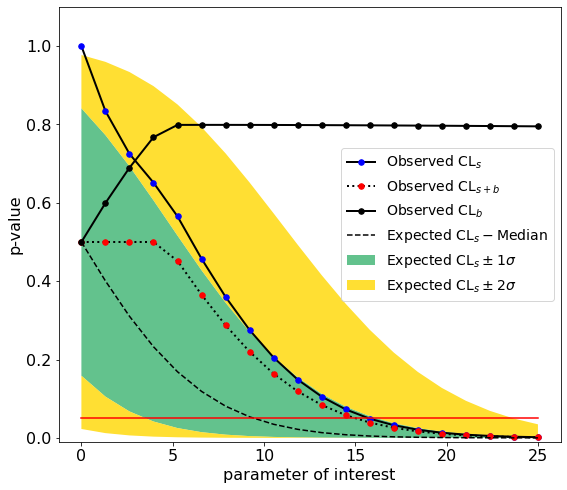

In [18]:
f = plt.figure(figsize=(9, 8))
plotlimit(ul, alpha=0.05, CLs=False)